# **Segmentação de Clientes**

### **1. Introdução:**


* Definição e Descrição do Problema:

O objetivo desta análise é segmentar os clientes da base de dados de consumidores utilizando técnicas de clusterização, a fim de identificar grupos com comportamentos de consumo semelhantes. A partir dessa segmentação, busca-se fornecer recomendações analíticas que apoiem a área de negócios na definição de estratégias mais eficazes de marketing, retenção e fidelização de clientes.

* Premissas e Hipóteses:

A análise considerará variáveis como padrão de gastos (por tipo de produto), canais de compra utilizados, frequência de interação com a plataforma, perfil demográfico (renda, composição familiar, escolaridade, estado civil) e engajamento com campanhas de marketing.



### **2. Catálogo de Dados:**

| Coluna                  | Descrição                                                                 |
|-------------------------|---------------------------------------------------------------------------|
| Income                  | Renda anual do cliente                                                    |
| Kidhome                 | Número de crianças pequenas na casa                                       |
| Teenhome                | Número de adolescentes na casa                                            |
| Recency                | Dias desde a última compra                                                 |
| MntWines               | Gasto com vinhos                                                           |
| MntFruits              | Gasto com frutas                                                           |
| MntMeatProducts        | Gasto com produtos de carne                                                |
| MntFishProducts        | Gasto com produtos de peixe                                                |
| MntSweetProducts       | Gasto com produtos doces                                                   |
| MntGoldProds           | Gasto com produtos de luxo ou premium (ex: ouro)                          |
| NumDealsPurchases      | Número de compras com desconto                                             |
| NumWebPurchases        | Número de compras feitas via site                                          |
| NumCatalogPurchases    | Número de compras por catálogo                                             |
| NumStorePurchases      | Número de compras em loja física                                           |
| NumWebVisitsMonth      | Número de visitas ao site no último mês                                   |
| AcceptedCmp1-5         | Participação em campanhas de marketing 1 a 5                               |
| Complain               | Indicador se o cliente fez alguma reclamação                              |
| Z_CostContact           | Variável de controle (provavelmente constante, não informativa)           |
| Z_Revenue               | Variável de controle (provavelmente constante, não informativa)           |
| Response               | Participação em última campanha de marketing                              |
| marital_Divorced       | Estado civil: divorciado (variável dummy)                                 |
| marital_Married        | Estado civil: casado (variável dummy)                                     |
| marital_Single         | Estado civil: solteiro (variável dummy)                                   |
| marital_Together       | Estado civil: vivendo junto (variável dummy)                              |
| marital_Widow          | Estado civil: viúvo (variável dummy)                                      |
| education_2n Cycle     | Escolaridade: ensino médio (variável dummy)                               |
| education_Basic        | Escolaridade: ensino fundamental (variável dummy)                         |
| education_Graduation   | Escolaridade: graduação (variável dummy)                                  |
| education_Master       | Escolaridade: mestrado (variável dummy)                                   |
| education_PhD          | Escolaridade: doutorado (variável dummy)                                  |
| MntTotal               | Gasto total (soma de todos os tipos de produtos)                          |
| MntRegularProds        | Gasto total com produtos não-premium (exclui MntGoldProds)                |
| AcceptedCmpOverall     | Total de campanhas aceitas (soma de AcceptedCmp1 a 5)



### **3. Análise**


In [59]:
#importando bibliotecas para a análise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from typing import List, Optional

from sklearn.decomposition import PCA
from IPython.display import clear_output

**3.1 Prévia dos Dados:**

In [2]:
file_path = 'https://raw.githubusercontent.com/kkkk-8548/consumer_cluster_analysis/refs/heads/main/consumer_df.csv'
df = pd.read_csv(file_path, sep = ',', encoding='ISO-8859-1')

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

**3.2 Feature Engineering**

Algumas variáveis podem ser unificadas, como:

* 'maritalmarital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow' podem ser simplificados como marital_status
* 'Teenhome' e 'Kidhome' podem ser simplificados com dependent
* Variáveis relacionadas a 'education' pode ser simplificado como: high_education

In [4]:
#função para unificar estado civil do consumidor
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['marital_status'] = df.apply(get_relationship, axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,1


In [5]:
#função para unificar dependentes do consumidor
def get_dependent(row):
    if row['Kidhome'] ==1:
        return 1
    elif row['Teenhome'] == 1:
        return 1
    else:
        return 0
df['dependent'] = df.apply(get_dependent, axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,dependent
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,1,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,1,1


In [6]:
#função para unificar nível de escolaridade do consumidor
def get_education(row):
    if row['education_2n Cycle'] ==1:
        return 1
    elif row['education_Graduation'] == 1:
        return 1
    elif row['education_Master'] == 1:
        return 1
    elif row['education_PhD'] == 1:
        return 1
    else:
        return 0
df['high_education'] = df.apply(get_education, axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,dependent,high_education
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,0,1,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,1,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,1,1,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,1,1,1


In [7]:
#total adquirido
df['MntTotal'] = df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

In [8]:
#excluindo as colunas substituídas na feature engineering

consumer_df = df.drop(columns=['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together',
                                'marital_Widow', 'Kidhome','Teenhome','education_2n Cycle', 'education_Basic',
                                'education_Graduation', 'education_Master', 'education_PhD','Z_CostContact', 'Z_Revenue'])

consumer_df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,dependent,high_education
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,1,63,2822,1529,1441,0,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,66,2272,21,15,0,0,1,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,55,2471,734,692,0,1,0,1
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,36,2298,48,43,0,1,1,1
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,39,2320,407,392,0,1,1,1


In [9]:
consumer_df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,dependent,high_education
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000
mean,51622.094785,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,...,0.009070,0.15102,51.095692,2512.718367,562.764626,518.707483,0.29932,0.644898,0.693878,0.975510
std,20713.063826,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,...,0.094827,0.35815,11.705801,202.563647,575.936911,553.847248,0.68044,0.478653,0.460986,0.154599
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,24.000000,2159.000000,4.000000,-283.000000,0.00000,0.000000,0.000000,0.000000
25%,35196.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.00000,43.000000,2339.000000,56.000000,42.000000,0.00000,0.000000,0.000000,1.000000
50%,51287.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,...,0.000000,0.00000,50.000000,2515.000000,343.000000,288.000000,0.00000,1.000000,1.000000,1.000000
75%,68281.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,...,0.000000,0.00000,61.000000,2688.000000,964.000000,884.000000,0.00000,1.000000,1.000000,1.000000
max,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,1.00000,80.000000,2858.000000,2491.000000,2458.000000,4.00000,1.000000,1.000000,1.000000


In [10]:
pd.set_option('display.max_columns', None)
consumer_df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,dependent,high_education
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,1529,1441,0,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,21,15,0,0,1,1
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,734,692,0,1,0,1
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,48,43,0,1,1,1
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,407,392,0,1,1,1


In [11]:
## verificando se há valores faltantes
consumer_df.isnull().sum()

,0
Income,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0
NumDealsPurchases,0
NumWebPurchases,0


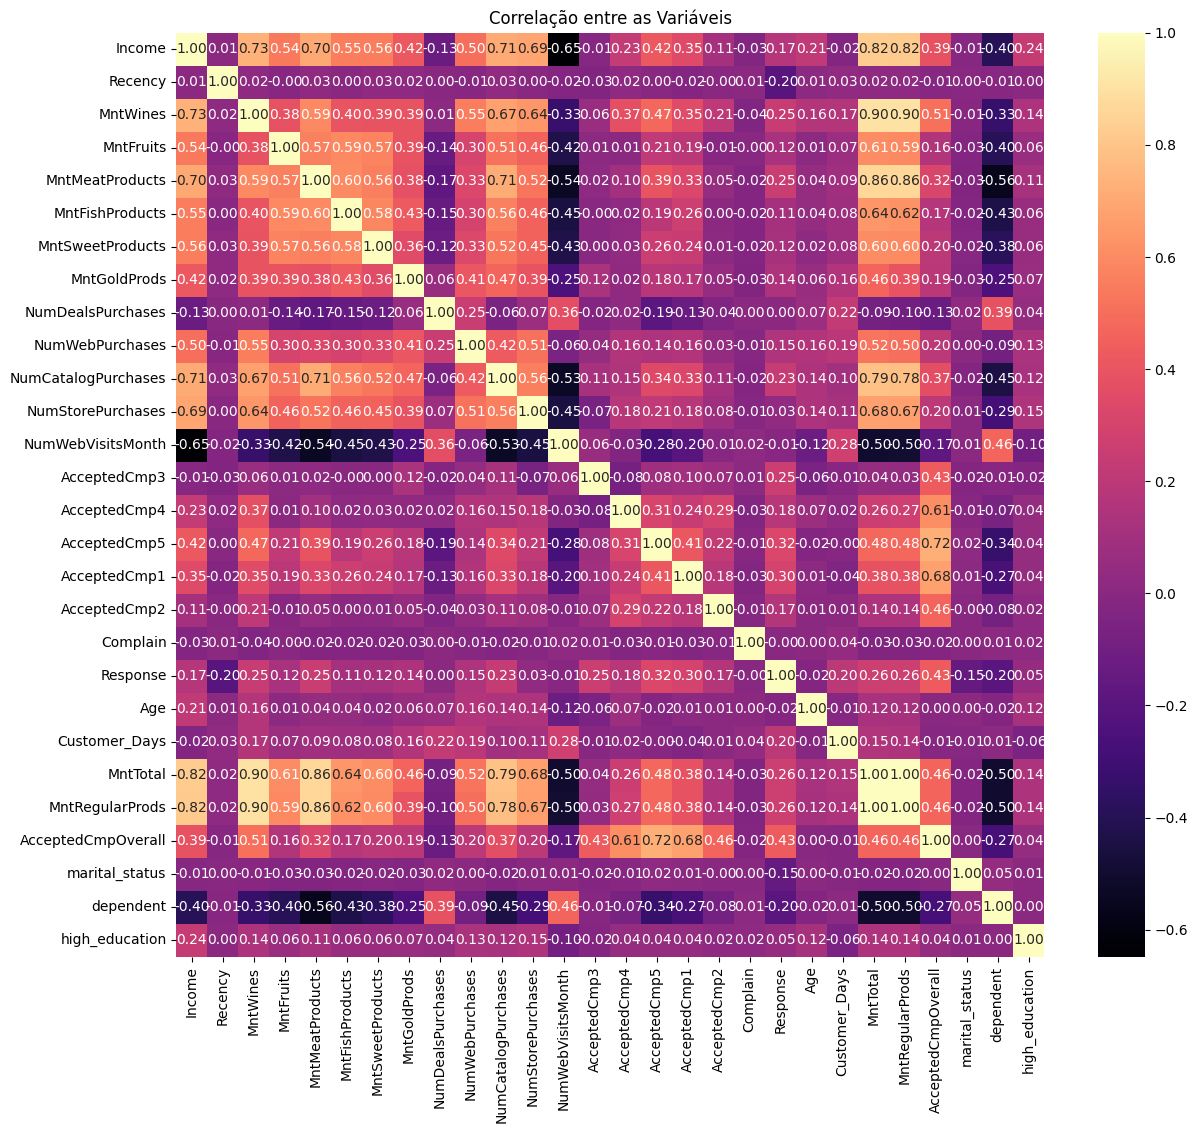

In [12]:
#verificando correlação de Pearson entre os atributos
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(consumer_df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlação entre as Variáveis')
plt.show()

A partir dessa correlação é possível identificar que a renda (income) é influenciado positivamente pelo o valor gasto, pelo consumo de carne e vinho, e tem uma correlação negativa com o número de crianças em casa e as visitas aos websites.

O valor gasto com vinho, além de estar relacionado a uma alta renda, também está associado ao valor gasto com carne e é adquirido tanto por Catálogo quanto em Lojas.

O número de crianças tem relação negativa com a renda, com o valor total gasto e, consequentemente, com o vinho. Renda mais alta também está associada à aceitação de Campanhas.

Assim, percebe-se que a renda é um fator muito relevante para esse análise por isso a presença de outliers deverá ser avaliada para esse atributo.

<Figure size 2000x2500 with 0 Axes>

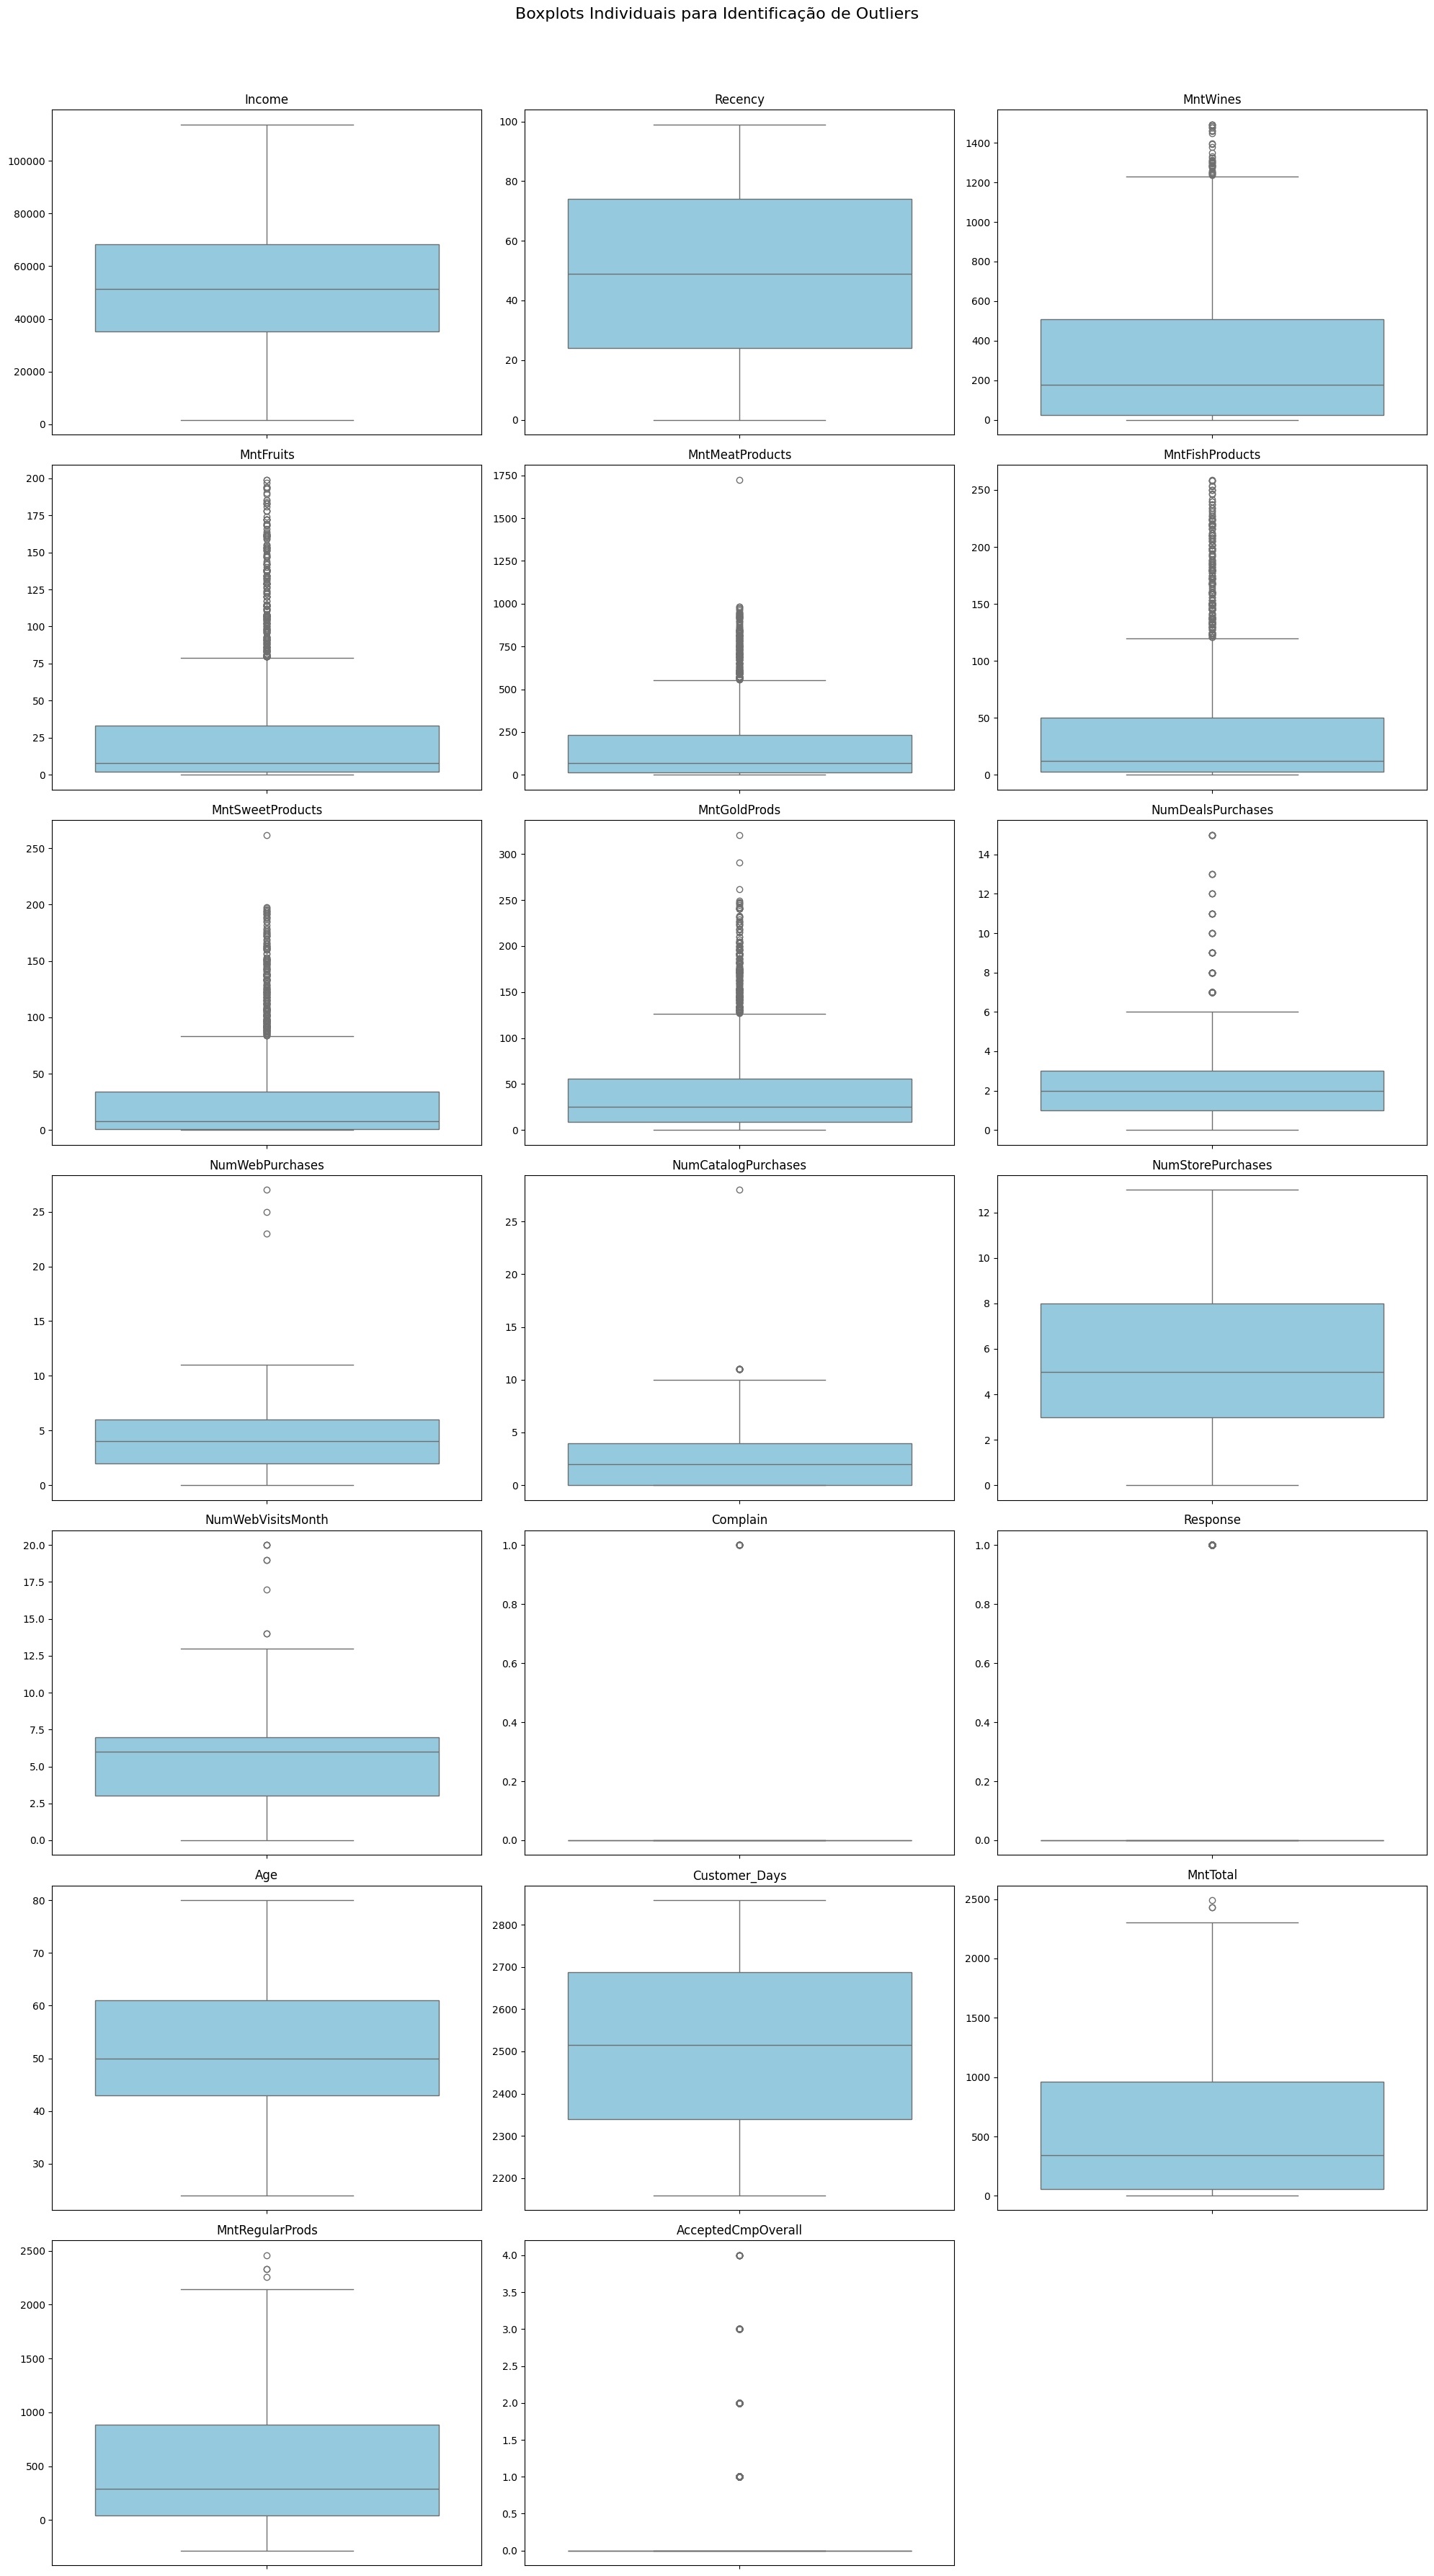

In [13]:
# Configurações iniciais
plt.figure(figsize=(20, 25))  # Aumentei o tamanho para acomodar todos os subplots

# Lista de atributos para análise
atributos = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Customer_Days',
    'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'
]

# Criar uma grade de subplots
num_cols = 3  # Número de colunas na grade
num_rows = (len(atributos) + num_cols - 1) // num_cols  # Calcula o número necessário de linhas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
fig.suptitle('Boxplots Individuais para Identificação de Outliers', fontsize=16, y=1.02)

# Achatando o array de eixos para facilitar a iteração
axes = axes.flatten()

# Plotando um boxplot para cada atributo
for i, atributo in enumerate(atributos):
    sns.boxplot(y=consumer_df[atributo], ax=axes[i], color='skyblue')
    axes[i].set_title(atributo, fontsize=12)
    axes[i].set_ylabel('')

    # Rotacionar rótulos do eixo x para melhor visualização
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

# Ocultar eixos vazios se houver
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Ajustando layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [14]:
#análise de outliers no atributo Income

Q1 = consumer_df.Income.quantile(0.25)
Q3 = consumer_df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = consumer_df[consumer_df.Income > Q3 + 1.5*IQR]
consumer_df = consumer_df[consumer_df.Income < Q3 + 1.5*IQR]
Income_outliers.head()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,dependent,high_education


In [15]:
#importando os atributos que possuem maior relavância para a análise
consumer_df_atribbutes = consumer_df[['Age', 'Income', 'AcceptedCmpOverall','Customer_Days','MntRegularProds','MntGoldProds' ]]

consumer_df_atribbutes.head()

,Age,Income,AcceptedCmpOverall,Customer_Days,MntRegularProds,MntGoldProds
0,63,58138.0,0,2822,1441,88
1,66,46344.0,0,2272,15,6
2,55,71613.0,0,2471,692,42
3,36,26646.0,0,2298,43,5
4,39,58293.0,0,2320,392,15


## **3. Segmentação dos Consumidores**

Será construído um algoritmo de clustering (agrupamento) k-means do zero usando Python e Pandas, em seguida, será comparado com a implementação de referência do scikit-learn.

K-means é uma técnica de aprendizado de máquina não supervisionado que nos permite agrupar pontos de dados. Isso nos permite encontrar padrões nos dados que podem nos ajudar a analisá-los mais efetivamente. K-means é um algoritmo iterativo, o que significa que ele convergirá para o clustering ideal com o tempo.


Etapas:

1. Escrever o código para o algoritmo
2. Codificar o algoritmo k-means
3. Plotar os clusters do algoritmo
4. Comparar o desempenho com o algoritmo do scikit-learn


Para executar um clustering k-means:

* Especificar o número de clusters desejados (normalmente chamado de k).

* Escolher aleatoriamente o centróide para cada cluster. O centróide é o ponto de dados que está no centro do cluster.

* Determinar quais pontos de dados pertencem a qual cluster encontrando o centróide mais próximo de cada ponto de dados.

* Atualizar os centróides com base na média geométrica de todos os pontos de dados no cluster.

Os passos 3 e 4 serão executados até que os centróides parem de mudar, cada execução é chamada de iteração.

### **3.1 Escalando os dados**



Os dados serão normalizados de 0 a 10, um método chamado também de Min-Max, onde os valores são deslocados e reescalonados para ficar no range de 0 a 10.
Esse cálculo é realizado subtraindo o dado pelo valor mínimo e dividindo  máximo

In [16]:
normal_consumer_df = ((consumer_df_atribbutes - consumer_df_atribbutes.min()) / (consumer_df_atribbutes.max() - consumer_df_atribbutes.min())) * 9 + 1

In [17]:
#cerificando que os dados estão normalizados de 1 a 10
normal_consumer_df.describe()

,Age,Income,AcceptedCmpOverall,Customer_Days,MntRegularProds,MntGoldProds
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5.354665,5.009043,1.673469,5.554314,3.632385,2.235247
std,1.881289,1.664383,1.530990,2.608116,1.818543,1.450548
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.053571,3.689136,1.000000,3.317597,2.067129,1.252336
50%,5.178571,4.982117,1.000000,5.583691,2.874863,1.700935
75%,6.946429,6.347657,1.000000,7.811159,4.831813,2.570093
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [18]:
#verificando os dados
normal_consumer_df.head()

,Age,Income,AcceptedCmpOverall,Customer_Days,MntRegularProds,MntGoldProds
0,7.267857,5.532624,1.0,9.536481,6.660708,3.467290
1,7.750000,4.584926,1.0,2.454936,1.978475,1.168224
2,5.982143,6.615398,1.0,5.017167,4.201386,2.177570
3,2.928571,3.002107,1.0,2.789700,2.070412,1.140187
4,3.410714,5.545079,1.0,3.072961,3.216344,1.420561


### **3.2 Randomizando os centróides:**

In [19]:
#função para randomizar os centróides
def random_centroids(normal_consumer_df, k):
    centroids = []
    for i in range(k):
        centroid = normal_consumer_df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [20]:
centroids = random_centroids(normal_consumer_df, 5)
centroids

<ipython-input-19-55081a0c7af5>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = normal_consumer_df.apply(lambda x: float(x.sample()))


,0,1,2,3,4
Age,7.910714,8.392857,4.696429,7.910714,4.053571
Income,4.364594,6.713028,4.223813,3.532686,6.480161
AcceptedCmpOverall,3.250000,1.000000,1.000000,1.000000,1.000000
Customer_Days,6.407725,7.811159,5.339056,3.858369,7.798283
MntRegularProds,4.313024,6.952937,2.044144,3.400219,1.000000
MntGoldProds,1.168224,2.850467,1.532710,1.168224,1.560748


### **3.3 Encontrando a menor distância entre os centróides e os dados**

In [21]:
#cálculo da distância de cada dado para cada centróide randomizado
distances = centroids.apply(lambda x: np.sqrt(((normal_consumer_df - x) ** 2).sum(axis=1)))  #fórmula da distância euclediana entre os dados e o centróide randomizado
distances.head()

#abaixo é possível verifocar, por exemplo, que o ponto 0 tem uma menor distância do cluster 4, ou seja, esse dado será alocado no cluster 4

,0,1,2,3,4
0,5.237030,2.470138,7.141349,7.250549,7.066067
1,5.119721,7.823454,4.232022,2.263629,6.849697
2,4.100353,4.653094,3.542017,4.028146,4.701237
3,7.061220,9.777961,3.357360,5.292871,6.306429
4,6.252446,8.040095,3.149701,5.001407,5.343047


In [22]:
# Rotula os dados e calcula a distância entre o dado e cada um dos clusters para encontrar o cluster mais próximo e alocar o dado no cluster mais próximo
def get_labels(normal_consumer_df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((normal_consumer_df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [23]:
#verificando quantos dados estão alocados em cada cluster
labels = get_labels(normal_consumer_df, centroids)
labels.value_counts()

,count
2,986
1,363
3,354
0,274
4,228


### **3.4 Atualizar os centróides com base na média geométrica de todos os pontos de dados no cluster.**

In [24]:
#atualizando o cálculo dos novos centróides a partir da média geométrica
centroids = normal_consumer_df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T #utilizando log e exp para minimizar dados, transpondo para que seja mais visível os clusters
centroids

,0,1,2,3,4
Age,6.231062,6.075662,4.084705,7.104087,3.806147
Income,5.499985,6.668197,3.930661,4.844725,4.610682
AcceptedCmpOverall,2.649248,1.490806,1.128493,1.168562,1.227849
Customer_Days,5.856342,7.162945,4.290194,2.538230,8.802682
MntRegularProds,4.288718,5.948343,2.538153,2.927987,3.007982
MntGoldProds,1.957130,3.055431,1.668714,1.576076,2.154838


In [25]:
#função que calcula os novos centróides
def new_centroids(normal_consumer_df, labels, k):
    centroids = normal_consumer_df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

### **3.5 Reproduzindo as etapas 3.3 e 3.4 até achar o centróide ideal**

Para conseguir visualizar melhor a iteração dos centroídes, será utlizado o método de redução de dimensionalidade PCA (Principal Component Analysis).

Esse método auxilia a visualizar os dados em 2 dimensões.

In [26]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(normal_consumer_df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

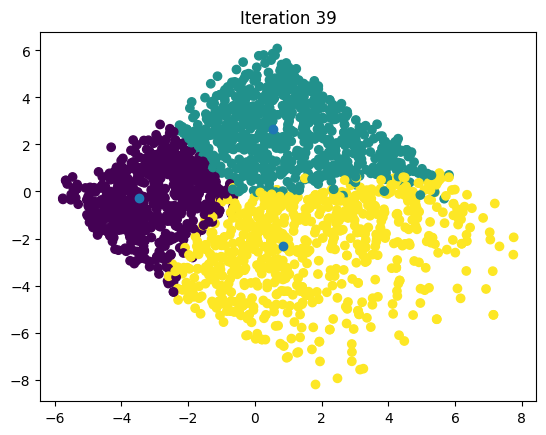

In [27]:
max_iterations = 100
centroid_count = 3 #3 clusters

centroids = random_centroids(normal_consumer_df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids): #enquanto as iterações forem menores que a iteração máxima estabelecida o código roda
    old_centroids = centroids #ou quando os centróides antigos são iguais aos novos centróides

    labels = get_labels(normal_consumer_df, centroids)
    centroids = new_centroids(normal_consumer_df, labels, centroid_count)
    plot_clusters(normal_consumer_df, labels, centroids, iteration)
    iteration += 1

In [28]:
centroids

,0,1,2
Age,4.796651,4.821003,5.344346
Income,3.803259,3.997771,6.710127
AcceptedCmpOverall,1.135595,1.150845,1.789417
Customer_Days,2.839498,7.771717,4.533963
MntRegularProds,2.232825,2.742644,5.369561
MntGoldProds,1.370297,1.813298,2.703892


In [29]:
labels.value_counts()

,count
1,802
2,752
0,651


### **4. Comparando os resultados com Sklearn**

In [30]:
#libs da Sklearn
from sklearn.cluster import KMeans

In [33]:
#kmeans = KMeans(3)
kmeans_plus = KMeans(n_clusters=3, init='k-means++', n_init=10)
kmeans = KMeans(3)
kmeans.fit(normal_consumer_df)

KMeans(n_clusters=3)

In [34]:
features = normal_consumer_df.columns

In [35]:
#centróides calculados pela lib do SkLearn
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
Age,5.062042,5.321817,5.699286
Income,3.859435,4.590391,6.718181
AcceptedCmpOverall,1.192308,1.298913,2.633333
Customer_Days,7.646253,3.029685,6.475575
MntRegularProds,2.544243,2.774563,5.816315
MntGoldProds,1.872274,1.662942,3.314766


In [36]:
#centróides calulados pelo algoritmo criado aqui
centroids

,0,1,2
Age,4.796651,4.821003,5.344346
Income,3.803259,3.997771,6.710127
AcceptedCmpOverall,1.135595,1.150845,1.789417
Customer_Days,2.839498,7.771717,4.533963
MntRegularProds,2.232825,2.742644,5.369561
MntGoldProds,1.370297,1.813298,2.703892


Comparando os centróides calculados pelo algortimo criado e os centróides calculados pelo KMeans do SkLearn, o cluster 2 do algoritmo está bem próximo do cluster 2 do Sklearn.

Como exemplo, baseado nos centróides, esse cluster são de consumidores mais velhos, com alta renda que gastam bastante, são os que mais aceitam campanhas de marketing e não são os consumidores que tem mais "tempo de casa".


In [37]:
#verificando os consumidores no cluster 1 do algoritmo calculado
cluster_2 = consumer_df[labels == 2]
cluster_2.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,dependent,high_education
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,734,692,0,1,0,1
5,62513.0,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,53,2452,702,688,0,1,1,1
11,63033.0,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,0,61,2385,1072,1042,0,0,0,1
14,82800.0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,1,74,2741,1270,1225,2,0,0,1
17,76995.0,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,0,71,2617,1606,1430,1,1,1,1


### **5. Analisando os consumidores de cada cluster**

In [49]:
consumer_features = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases",
                   "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Customer_Days", "MntRegularProds",
                    "marital_status",	"dependent",	"high_education",
                    "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2"]

In [56]:
#gráfico mostrando cada atributo de um cluster

def plot_cluster_attributes(
    df,
    cluster_col="cluster",
    hue_vars=None,
    palette="viridis",
    n_cols=3,
    figsize_per_plot=(6, 4)
):

    # Configuração do estilo
    sns.set_theme(style="whitegrid")
    plt.rcParams["font.size"] = 12

    # Atributos padrão se hue_vars não for fornecido
    if hue_vars is None:
        hue_vars = consumer_features

    # Calcula o número de linhas necessárias
    n_plots = len(hue_vars)
    n_rows = math.ceil(n_plots / n_cols)

    # Cria a figura e os subplots
    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(figsize_per_plot[0] * n_cols, figsize_per_plot[1] * n_rows),
        squeeze=False  # Garante que axes seja sempre 2D, mesmo com 1 linha
    )
    fig.suptitle(f"Distribuição de Atributos por Cluster ({cluster_col})", fontsize=16, y=1.05)

    # Plota cada atributo em um subplot
    for idx, attr in enumerate(hue_vars):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]

        sns.countplot(
            x=cluster_col,
            hue=attr,
            data=df,
            ax=ax,
            palette=palette,
            edgecolor=".2"  # Melhora a visualização das barras
        )
        ax.set_title(f"Distribuição de {attr}")
        ax.legend(title=attr, bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico

    # Remove subplots vazios (se houver)
    for idx in range(n_plots, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

In [43]:
#incluindo uma coluna com o cluster designado de cada consumidor
consumer_df['cluster'] = labels

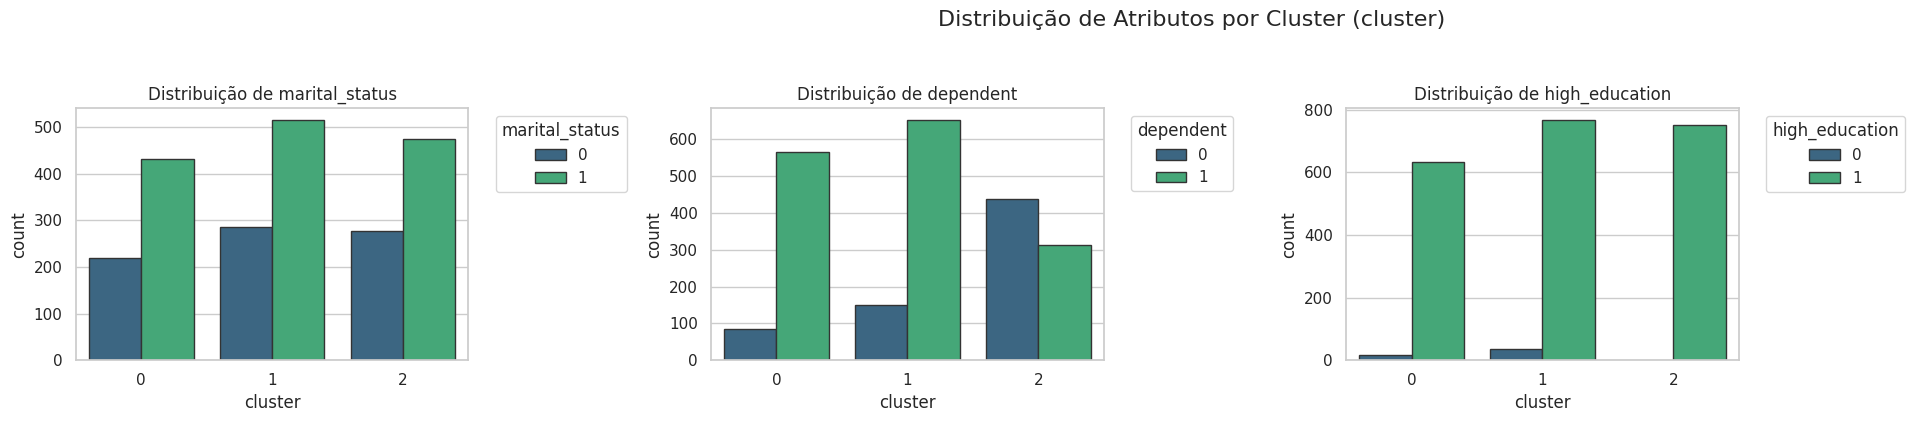

In [57]:
plot_cluster_attributes(consumer_df, cluster_col="cluster", hue_vars=["marital_status", "dependent", "high_education"], palette="viridis", n_cols=4, figsize_per_plot=(6, 4))

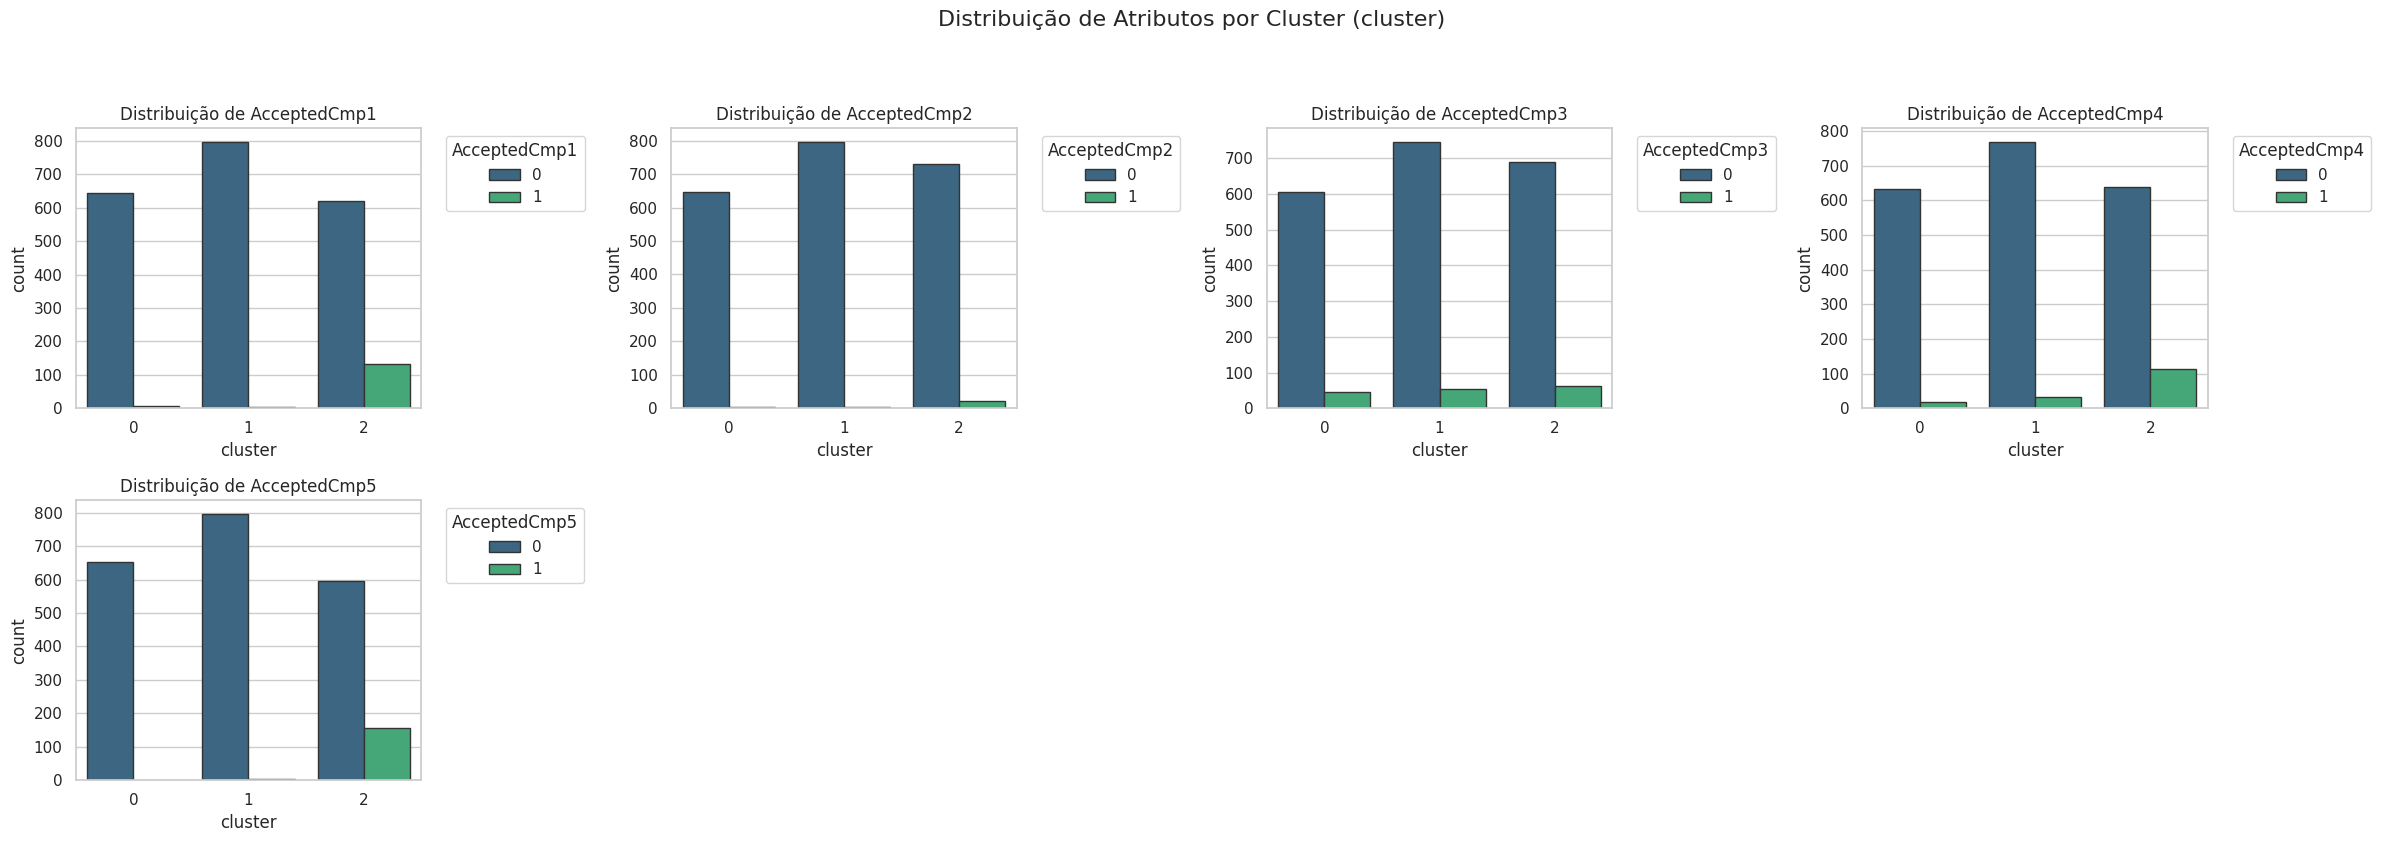

In [58]:
plot_cluster_attributes(consumer_df, cluster_col="cluster", hue_vars=["AcceptedCmp1","AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], palette="viridis", n_cols=4, figsize_per_plot=(6, 4))

In [66]:
distributed_features = ["Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases",
                   "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "MntRegularProds"]

In [71]:
def plot_histograms_per_cluster(
    df: pd.DataFrame,
    cluster_col: str = "cluster",
    features: Optional[List[str]] = None,
    n_clusters: int = 3,
    bins: int = 20,
    figsize_per_plot: tuple = (5, 4),
    palette: str = "tab10"
) -> None:

    sns.set_theme(style="whitegrid")
    plt.rcParams["font.size"] = 11

    # Seleciona features numéricas se não forem passadas
    if features is None:
        features = df.select_dtypes(include='number').columns.drop(cluster_col).tolist()

    n_features = len(features)

    # Calcula limites de x e máximos de y por feature
    axis_limits = {}
    for feature in features:
        # Intervalo do eixo x
        x_min = df[feature].min()
        x_max = df[feature].max()

        # Máximo do eixo y (maior contagem entre todos os clusters)
        max_count = 0
        for cluster_id in range(n_clusters):
            data = df[df[cluster_col] == cluster_id][feature]
            counts = pd.cut(data, bins=bins).value_counts()
            max_count = max(max_count, counts.max())

        axis_limits[feature] = {"xlim": (x_min, x_max), "ylim": (0, max_count)}

    # Cria subplots
    fig, axes = plt.subplots(
        nrows=n_features,
        ncols=n_clusters,
        figsize=(figsize_per_plot[0] * n_clusters, figsize_per_plot[1] * n_features),
        squeeze=False
    )
    fig.suptitle("Distribuição das Features por Cluster", fontsize=16, y=1.02)

    for i, feature in enumerate(features):
        for j in range(n_clusters):
            ax = axes[i, j]
            cluster_data = df[df[cluster_col] == j][feature]

            sns.histplot(
                cluster_data,
                bins=bins,
                kde=False,
                ax=ax,
                color=sns.color_palette(palette)[j],
                edgecolor=".2"
            )
            ax.set_title(f"{feature} - Cluster {j}")
            ax.set_xlabel(feature)
            ax.set_ylabel("Contagem")

            # Ajusta eixos
            ax.set_ylim(axis_limits[feature]["ylim"])
            ax.set_xlim(axis_limits[feature]["xlim"])

    plt.tight_layout()
    plt.show()




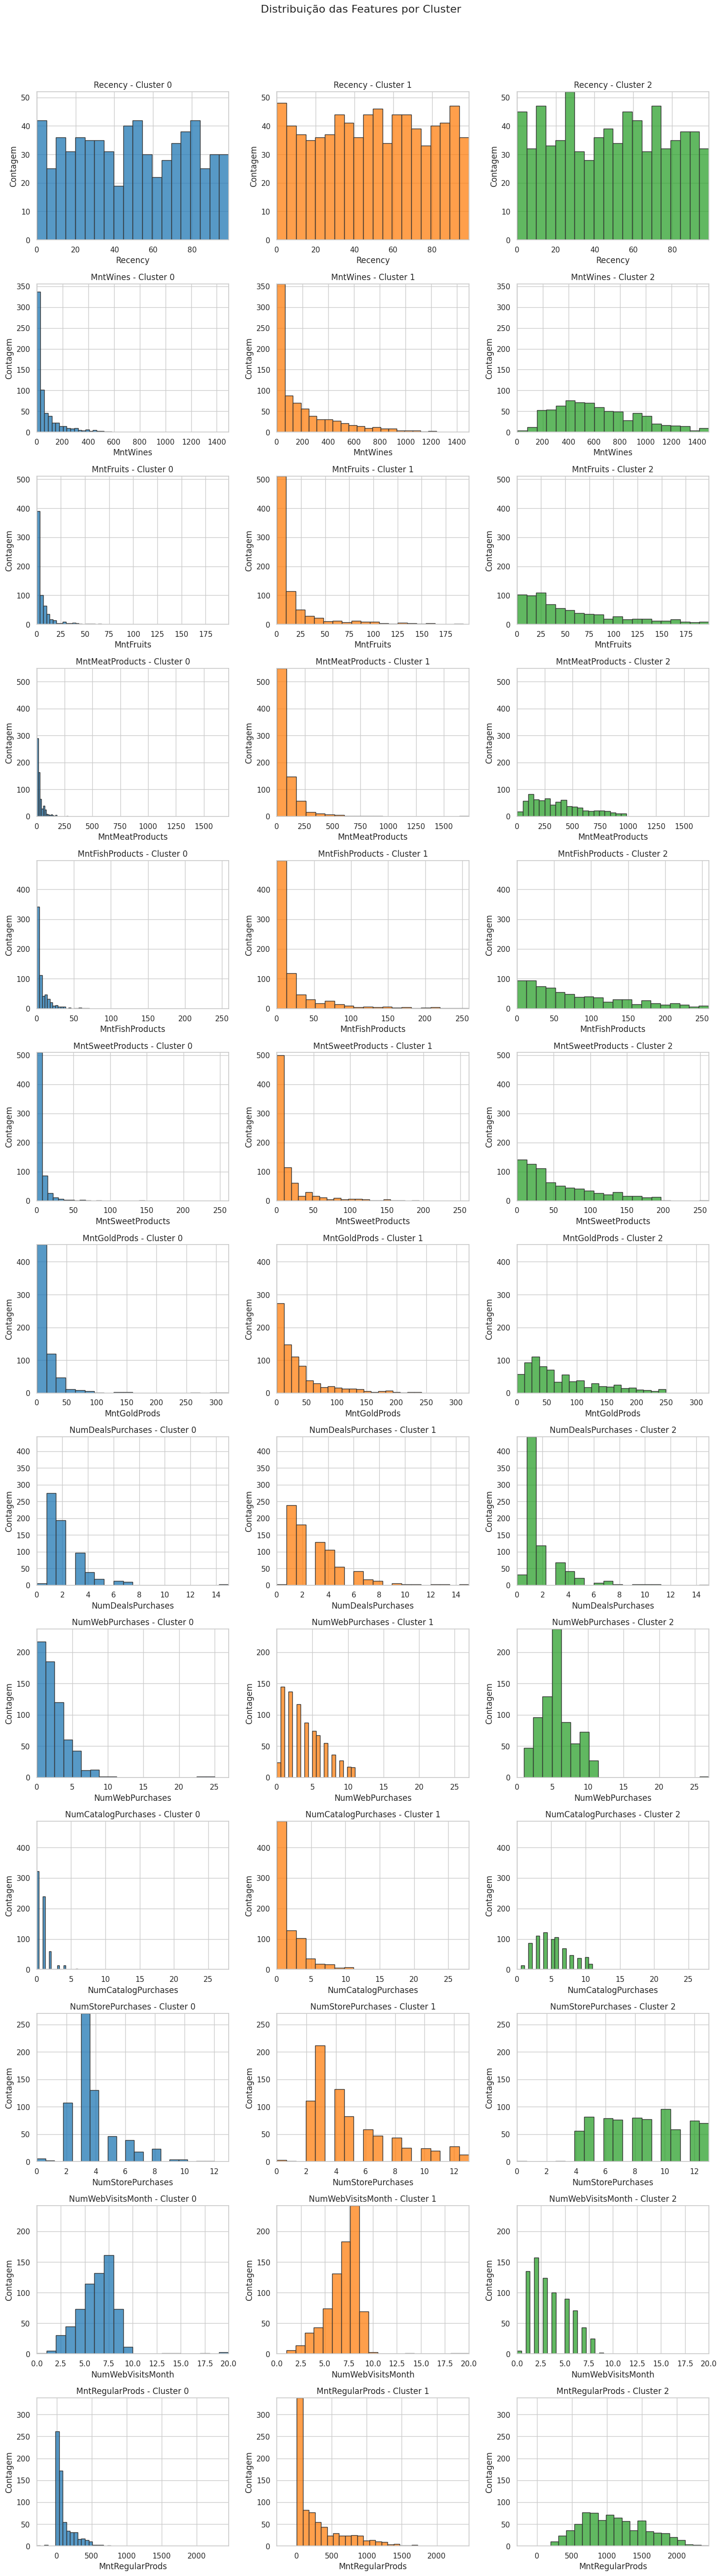

In [72]:
plot_histograms_per_cluster(consumer_df, cluster_col="cluster", features=distributed_features, n_clusters=3)


### **6. Análise dos Resultados**




* **Cluster 0:** Renda Baixa
      - 802 consumidores
      - Mais jovens
      - Menor "tempo de casa"
      - Os que menos aceitam campanhas de marketing
      - Grupo que mais adquire produtos na loja física


* **Cluster 1:** Renda Média
      - 752 consumidores
      - Grupo com maior "tempo de casa"
      - Grupo que mais tem dependentes
      - Consome mais doces
      - Alto volume de consumo de itens básicos (Carne, Peixe e Frutas)
      

* **Cluster 2:** Renda Alta
      - 651 consumidores
      - Grupo que mais aceita campanha de marketing
      - Maioria não tem dependentes
      - Mais velhos
      - Compras de Ticket Médio alto em Vinhos
      - Alta relevância de compras online


**Insights:** Dado contraintuitivo, os consumidores mais jovens tem um alto consumo de produtos em loja física e consumidores mais velhos tem um consumo expressivo online.

**Vendas:**
  - Oportunidade de impulsionar vendas online de vinhos para os consumidores do cluster de Renda Alta (2)
  - Impulsionar programas de fidelização do público do cluster de Renda Média, já que são o público com maior "tempo de casa".
  - Direcionar campanhas de vendas nas lojas físicas para o público de Renda Baixa, já que consomem bastante presencialmente.

**Marketing:** A campanha de marketing 3 e 4 foram as que tiveram mais aceitação dentre todos os clusters, uma possível recomendação dessa análise direcionada ao time de marketing, seria investir nesse modus operandi pois alcançou consumidores de todos os perfis.